<a href="https://colab.research.google.com/github/robitussin/CCADMACL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [21]:
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))


The total number of data-points after removing the rows with missing values are: 4808


In [26]:
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')

dates = []
for i in df["date_added"]:
    i = i.date()
    dates.append(i)


In [27]:
earliest_date = df['date_added'].min()

# Calculate days since the earliest date
df['days_added'] = (df['date_added'] - earliest_date).dt.days

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,3279
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",4006
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3607
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,4383
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3469


In [29]:

# prompt: create number of unique vals in all cols

import pandas as pd

# Assuming df is already defined from the previous code block
# ... (your previous code) ...

def nunique_in_all_cols(df):
  """
  Calculates the number of unique values in each column of a Pandas DataFrame.
  """
  for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values.")

nunique_in_all_cols(df)

Column 'show_id' has 4808 unique values.
Column 'type' has 2 unique values.
Column 'title' has 4808 unique values.
Column 'director' has 3613 unique values.
Column 'cast' has 4688 unique values.
Column 'country' has 544 unique values.
Column 'date_added' has 1288 unique values.
Column 'release_year' has 71 unique values.
Column 'rating' has 14 unique values.
Column 'duration' has 195 unique values.
Column 'listed_in' has 323 unique values.
Column 'description' has 4803 unique values.
Column 'days_added' has 1288 unique values.


In [30]:
to_drop = ["show_id", "title", "cast", "director", "description"]
df = df.drop(to_drop, axis=1)

In [31]:
df.describe()

,date_added,release_year,days_added
count,4808,4808.000000,4808.000000
mean,2019-01-08 10:55:00.499168,2012.710275,4025.454867
min,2008-01-01 00:00:00,1942.000000,0.000000
25%,2018-03-01 00:00:00,2011.000000,3712.000000
50%,2019-03-02 00:00:00,2016.000000,4078.000000
75%,2020-01-07 00:00:00,2018.000000,4389.000000
max,2021-01-16 00:00:00,2021.000000,4764.000000
std,NaN,9.521541,501.027115


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])



In [33]:
df.head()

,type,country,date_added,release_year,rating,duration,listed_in,days_added
1,0,239,2016-12-23,2016,8,188,234,3279
2,0,296,2018-12-20,2011,5,170,260,4006
3,0,440,2017-11-16,2009,4,174,47,3607
4,0,440,2020-01-01,2008,4,25,218,4383
5,1,357,2017-07-01,2016,8,0,297,3469


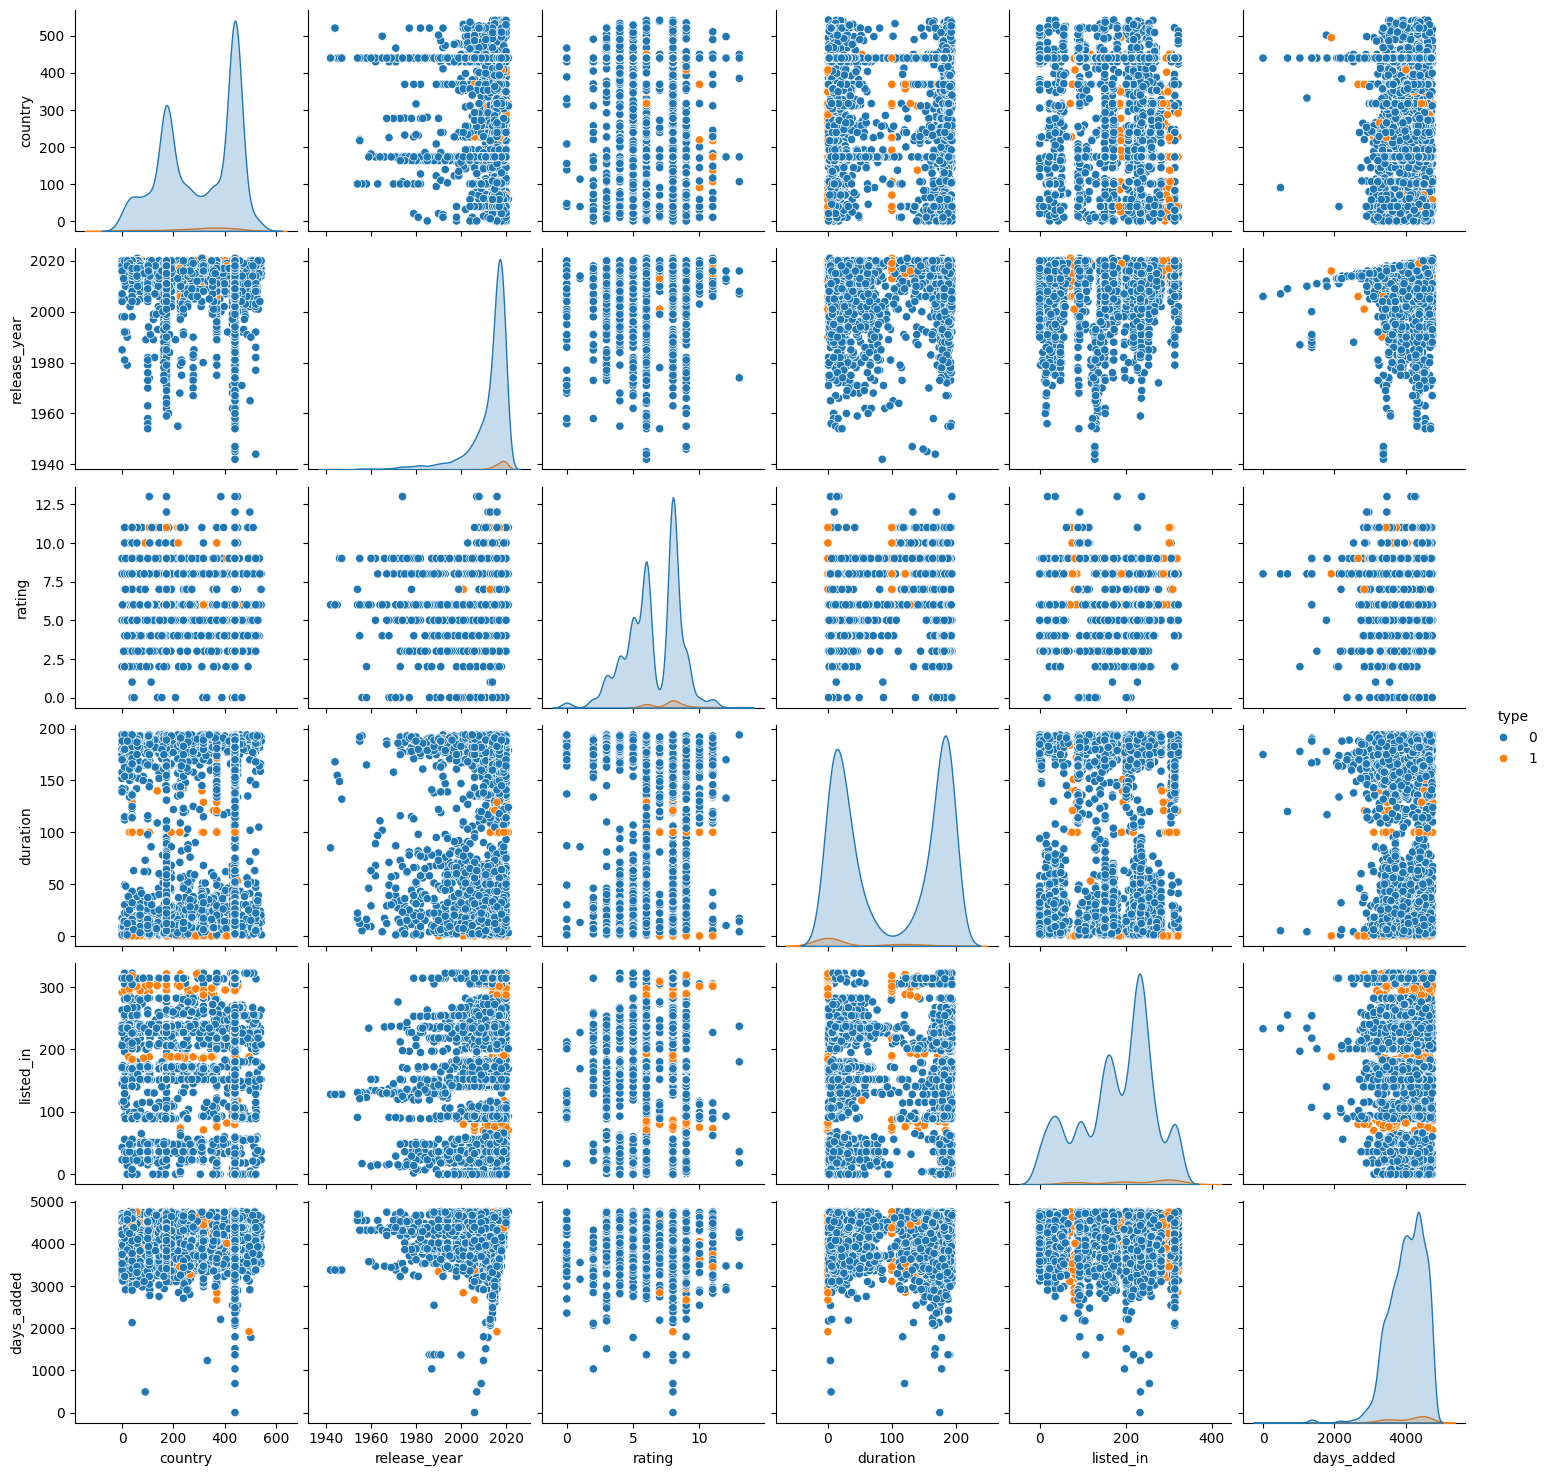

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='type')
plt.show()


In [35]:
# Drop rows where release_year is 1950 or less
df = df[df['release_year'] > 1950]
df = df[df['days_added'] > 2500]
dfCountry = df[['country']].copy()

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame from the previous code
# ... (your previous code) ...

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_data = scaler.fit_transform(numerical_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=df.index)

# If you need to, you can concatenate the scaled numerical features back with
# the original non-numerical features
# final_df = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)

scaled_df.head()

,type,country,release_year,rating,duration,listed_in,days_added
1,-0.170067,-0.415831,0.341903,0.725728,1.158429,0.629710,-1.674396
2,-0.170067,-0.020843,-0.200404,-0.794506,0.931524,0.933886,-0.082659
3,-0.170067,0.977022,-0.417327,-1.301251,0.981948,-1.558022,-0.956253
4,-0.170067,0.977022,-0.525789,-1.301251,-0.896320,0.442524,0.742768
5,5.880019,0.401864,0.341903,0.725728,-1.211465,1.366753,-1.258399


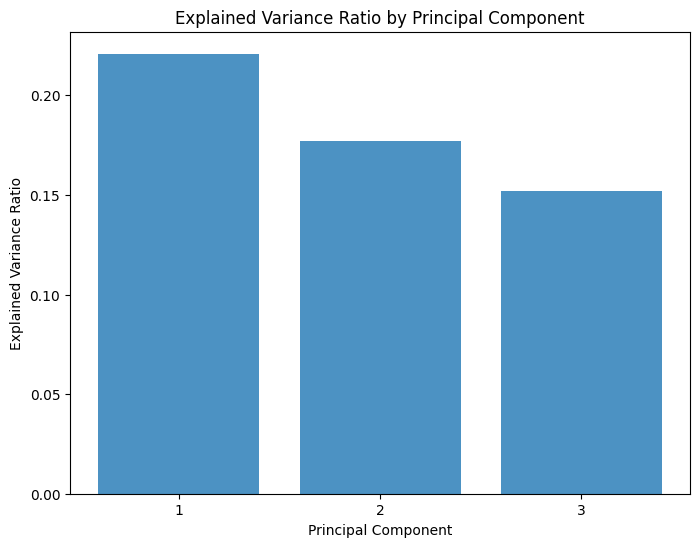

In [38]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# ... (your existing code) ...

# Assuming df is already preprocessed as in your previous code

# Apply PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create the explained variance plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


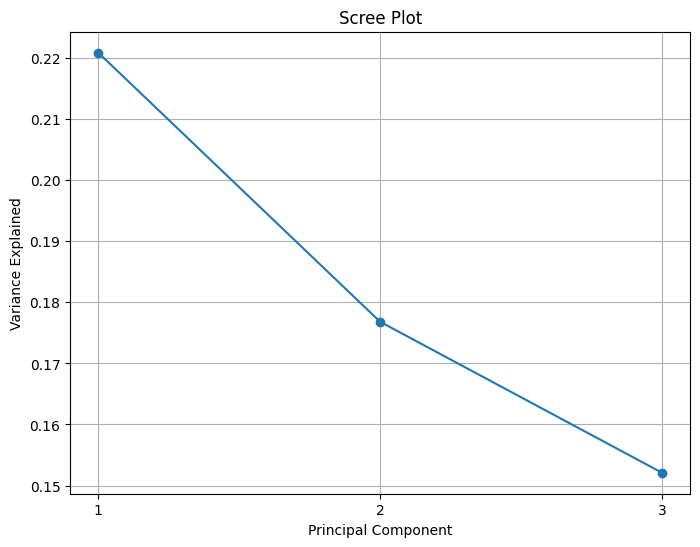

In [39]:
import matplotlib.pyplot as plt
# ... (your existing code) ...

# Assuming pca_df and pca are already defined from the previous code block

# Scree plot for each principal component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


In [40]:

import plotly.express as px

# Assuming pca_df is already created as in your previous code
# ... (your existing code) ...

# Create the 3D scatter plot using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    title='3D PCA Representation of Netflix Shows')
fig.show()

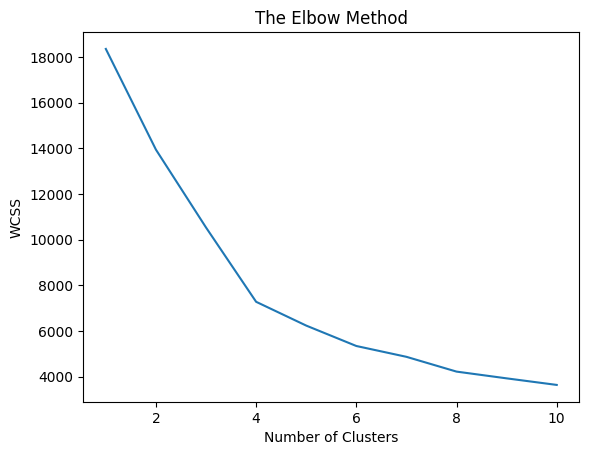

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow method, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3

In [42]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['cluster'] = kmeans.labels_
df['clusters'] = kmeans.labels_
# Visualize the clusters in 3D using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='cluster',
                    title=f'3D PCA Representation of Netflix Shows with KMeans (k={optimal_k})')
fig.show()

<ipython-input-43-80a7a89487e0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-43-80a7a89487e0>:2: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



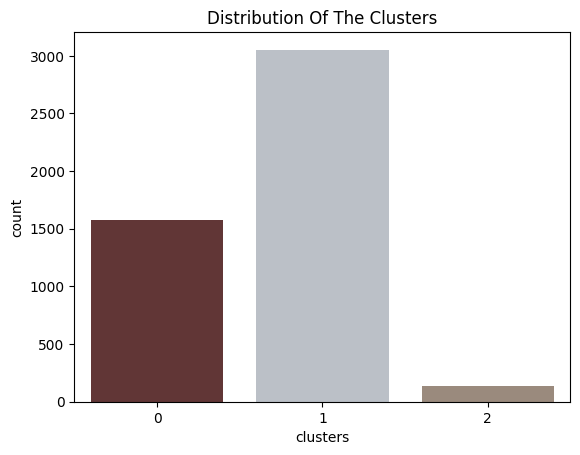

In [43]:


pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

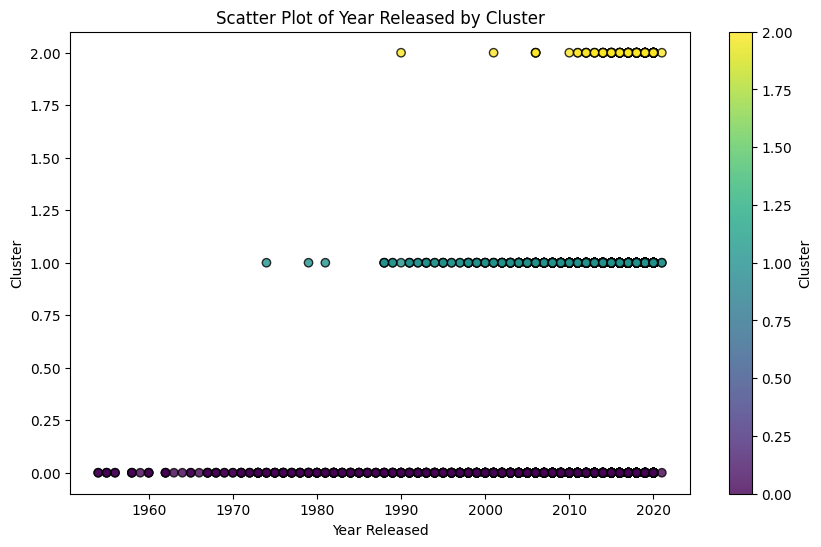

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a colormap for clusters
colors = plt.cm.viridis(df["clusters"] / df["clusters"].max())  # Normalize cluster values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["release_year"], df["clusters"], c=df["clusters"], cmap="viridis", alpha=0.8, edgecolors="k")

# Add labels and title
plt.title("Scatter Plot of Year Released by Cluster")
plt.xlabel("Year Released")
plt.ylabel("Cluster")

# Add a color bar for reference
plt.colorbar(label="Cluster")

# Show the plot
plt.show()


In [45]:
print(f"Min release_year: {df['release_year'].min()}")
print(f"Max release_year: {df['release_year'].max()}")

Min release_year: 1954
Max release_year: 2021


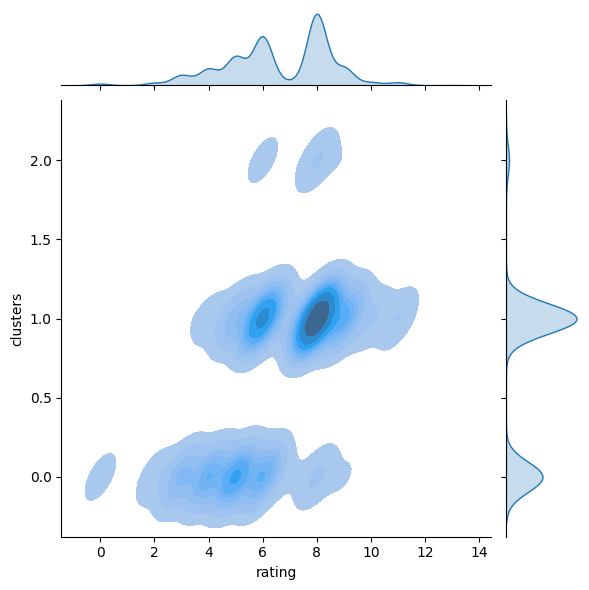

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'rating' and 'clusters' columns
# ... (your existing code) ...

# Create the joinplot
sns.jointplot(x='rating', y='clusters', data=df, kind='kde', fill=True , palette='viridis')


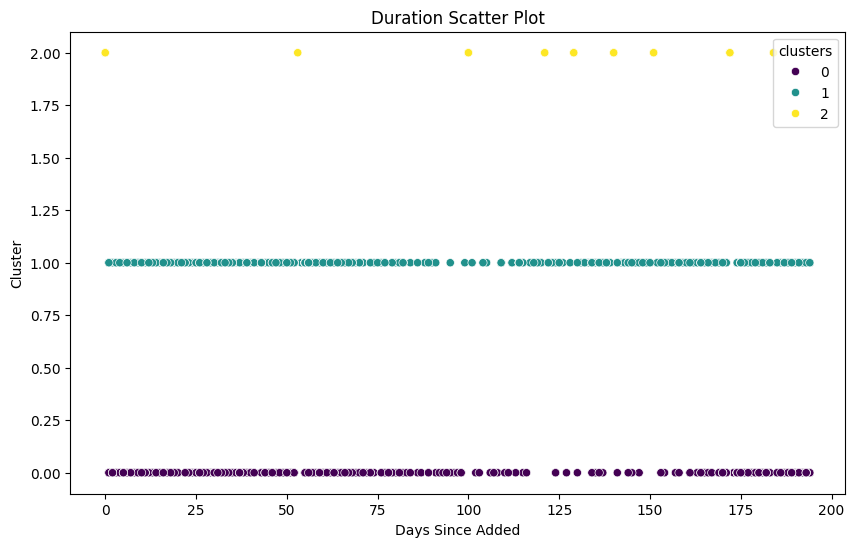

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has 'days_added' and 'clusters' columns
# ... (your existing code) ...


plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='clusters', data=df, hue='clusters', palette='viridis')
plt.title('Duration Scatter Plot')
plt.xlabel('Days Since Added')
plt.ylabel('Cluster')
plt.show()

In [48]:
import plotly.express as px

# Assuming 'df' is your DataFrame with 'rating' and 'clusters' columns

fig = px.box(df, x='clusters', y='rating', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(
    title='Boxplot of Ratings by Cluster',
    xaxis_title='Cluster',
    yaxis_title='Rating'
)

fig.show()

In [49]:
import pandas as pd
import plotly.express as px




# Create the choropleth map
fig = px.choropleth(df, locations= dfCountry["country"], color= df['clusters'],
                    locationmode='country names',  # Set locationmode to 'country names'
                    title='Countries Clustered Geographically')

fig.show()


In [50]:

df.head()

,type,country,date_added,release_year,rating,duration,listed_in,days_added,clusters
1,0,239,2016-12-23,2016,8,188,234,3279,1
2,0,296,2018-12-20,2011,5,170,260,4006,1
3,0,440,2017-11-16,2009,4,174,47,3607,0
4,0,440,2020-01-01,2008,4,25,218,4383,0
5,1,357,2017-07-01,2016,8,0,297,3469,2


In [52]:
cluster_profiles = {
    0: ["Very old shows to modern", "Shows made mostly from the East"],
    1: ["Old shows to modern", "Shows made mostly from all regions"],
    2: ["Modern shows", "Shows made in Europe"]
}

similarities = ["Duration", "Days since added", "Ratings"]

for cluster_id, profile in cluster_profiles.items():
    print(f"Cluster {cluster_id}:")
    for feature in profile:
        print(f" - {feature}")
    print()  # Print a blank line

print("Similarities across clusters:")
for feature in similarities:
    print(f" - {feature}")


Cluster 0:
 - Very old shows to modern
 - Shows made mostly from the East

Cluster 1:
 - Old shows to modern
 - Shows made mostly from all regions

Cluster 2:
 - Modern shows
 - Shows made in Europe

Similarities across clusters:
 - Duration
 - Days since added
 - Ratings
